In [22]:
"""
Read, clean, and plot financial time series from stock indices using matplotlib
"""

import csv
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

In [23]:
# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"

# Financial data files
DJIA_34 = DATA_PATH + "DJIA_34.csv"
DJIA = DATA_PATH + "DJIA.csv"
NASDAQ_100 = DATA_PATH + "NASDAQ_100.csv"
NASDAQ = DATA_PATH + "NASDAQ.csv"
SP500 = DATA_PATH + "SP500.csv"


In [24]:
###################################################################
# Part 1 - Read, clean, and plot financial time series data 

def read_series(index_file):
    """
    Input: String index_file for CSV file containing stock index data
    
    Output: Time series as a list of tuples where each tuple is
    a pair of strings corresponding to a row in the CSV file
    """ 
    # open the file
    with open(index_file, 'r') as read_file:
        # read the file
        csv_reader = csv.reader(read_file)
        # convert to list of tuples
        list_of_tuples = list(map(tuple, csv_reader))
    return list_of_tuples

# testing
# djia34 = read_series(DJIA_34)
# print(djia34)
# print(len(djia34))

In [25]:
def clean_series(raw_series):
    """
    Input: List raw_series whose entries are tuples (date, price)
    where dates corresponding to holidays have price "."
    
    Output: A list whose entries are tuples consisting of
    a date (string) and a price (float). Entries corresponding
    to the header and holidays have been removed.
    """
    
    result = []
    # remove the header
    raw_series.remove(raw_series[0])
    for element in raw_series:
        # skip the holidays
        if element[1] == '.':
            pass
        else:
            # add all non holidays to output
            result.append((element[0], float(element[1])))
    return result
# testing
# djia34 = read_series(DJIA_34)
# print((clean_series(djia34)))

In [26]:
def plot_prices(index_file):
    """
    Input: String index_file corresponding to a csv file
    containing financial time series data
    
    Output: matplotlib figure consistin of a line plot 
    of prices from cleaned series
    y-axis should have appropriate label
    """
    fig, axs = plt.subplots()
    # read and clean
    read = read_series(index_file)
    clean = clean_series(read)
    list_prices = []
    for element in clean:
        # add prices to list
        list_prices.append(element[1])
    # display prices on a figure
    plt.plot(list_prices)
    axs.set_ylabel("Index price in USD")
    plt.show()
    
    return fig

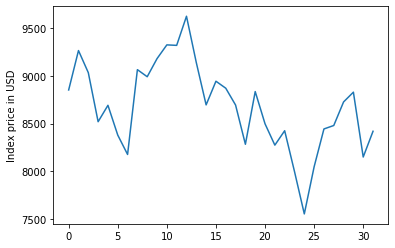

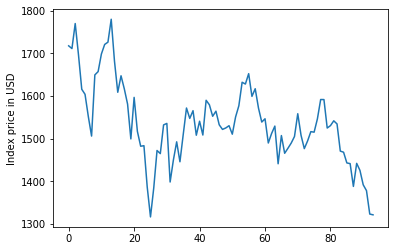

In [27]:
def test_plot_prices():
    """ Test plot_prices """
    
    plot_prices(DJIA_34)
    plot_prices(NASDAQ_100)

test_plot_prices()

In [28]:
###########################################################
# Part 2 - Convert ISO data format to days and make better plots

def isodate_to_day(isodate):
    """
    Input: A string date in ISO date format

    Output: Float corrspending to mumber of days used in
    matplotlib's plt.plot_date()
    """
    # use the strptime method and date2num methods
    # to convert an isodate to matplotlib's date format
    date_object = datetime.datetime.strptime(str(isodate), "%Y-%m-%d")
    result = date2num(date_object)
    
    return result

# print(isodate_to_day('2021-09-12'))

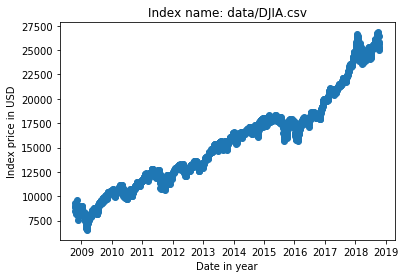

Figure(432x288)


In [29]:
###########################################################
# Student code for more plots in matplotlib (peer-graded)

def plot_dates_prices(index_file):
    """
    Input: Strings index_file for CSV file with stock index data
    
    Output: matplotlib figure generated by reading the CSV file
    index_file and plotting the dates/prices using isodate_to_day()
    """
    
    fig, axs = plt.subplots()
    # read and clean
    read = read_series(index_file)
    clean = clean_series(read)
    resultdates = []
    resultprices = []
    # add dates and prices to list
    for element in clean:
        resultprices.append(element[1])
        resultdates.append(isodate_to_day(element[0]))
    # plot dates and prices and label the plot   
    plt.plot_date(resultdates, resultprices)
    axs.set_ylabel("Index price in USD")
    axs.set_xlabel("Date in year")
    axs.set_title("Index name: " + str(index_file))
    plt.show()
    
    return fig

print(plot_dates_prices(DJIA))

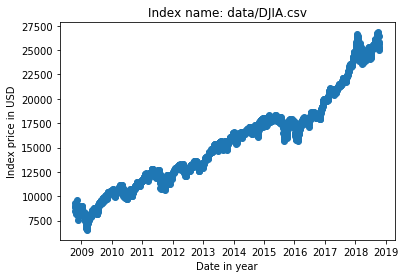

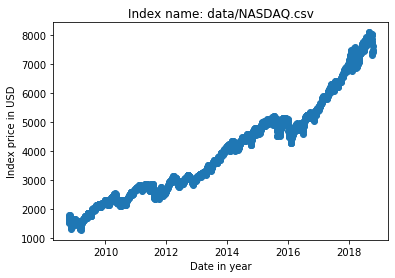

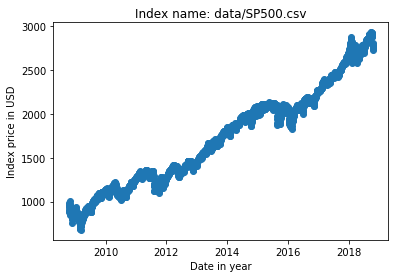

In [30]:
def test_plot_dates_prices():
    """ Test plot_dates_prices"""

    plot_dates_prices(DJIA)
    plot_dates_prices(NASDAQ)
    plot_dates_prices(SP500)
    
test_plot_dates_prices() 

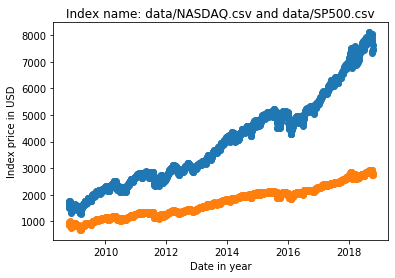

Figure(432x288)


In [31]:
def plot_two_indices(index_file1, index_file2):
    """
    Input: Strings index_file1 and index_file2
    with CSV data for pair of stock indices
    
    Output: matplotlib figure generated by plotting a comparison
    of the price of two indices in the style of 
    https://matplotlib.org/gallery/api/two_scales.html
    """
    
    fig, ax1 = plt.subplots()
    # read and clean
    read = read_series(index_file1)
    clean = clean_series(read)
    resultdates = []
    resultprices = []
    # add dates and prices to list
    for element in clean:
        resultprices.append(element[1])
        resultdates.append(isodate_to_day(element[0]))
        
    plt.plot_date(resultdates, resultprices)
    # read and clean
    read = read_series(index_file2)
    clean = clean_series(read)
    resultdates = []
    resultprices = []
    # add dates and prices to list
    for element in clean:
        resultprices.append(element[1])
        resultdates.append(isodate_to_day(element[0]))
    # plot dates and prices and label the plot     
    plt.plot_date(resultdates, resultprices)
    ax1.set_ylabel("Index price in USD")
    ax1.set_xlabel("Date in year")
    ax1.set_title("Index name: " + str(index_file1) + " and " + str(index_file2))
    plt.show()
    
    return fig

print(plot_two_indices(NASDAQ, SP500))

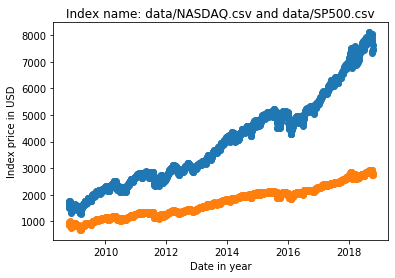

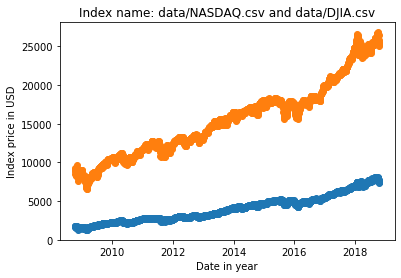

In [32]:
def test_plot_two_indices():
    """ Test plot_two_indices """
    
    plot_two_indices(NASDAQ, SP500)
    plot_two_indices(NASDAQ, DJIA)
    
test_plot_two_indices()